In [95]:
class L_transformer():
    """Applies linear transformation in R2"""
    
    def __init__(self, cos=1, sin=0, scale=1):
        self.scale = scale
        self.rotation = np.array([[cos, -sin], [sin, cos]])
    
    def transform(self, X):
        return np.dot(self.rotation, X.T).T * self.scale

In [96]:
t = L_transformer()
t.set_rotation(math.cos(math.radians(60)), math.sin(math.radians(60)))

In [86]:
a = np.array([[1,0],[1,1],[0,1]])
np.dot(t.rotation, a.T).T

array([[ 0.5      ,  0.8660254],
       [-0.3660254,  1.3660254],
       [-0.8660254,  0.5      ]])

In [87]:
np.dot(a, t.rotation)

array([[ 0.5      , -0.8660254],
       [ 1.3660254, -0.3660254],
       [ 0.8660254,  0.5      ]])

In [106]:
n = t.transform(data[['snout_x','snout_y']].values)
n

array([[ 25.36616078, 226.68147926],
       [ 24.79891414, 227.00897926],
       [ 24.75734492, 227.03297926],
       ...,
       [ 50.98002045, 271.5439856 ],
       [ 48.94702045, 268.02272631],
       [ 46.82702045, 264.35077859]])

In [107]:
data[['snout_x','snout_y']] = n

In [108]:
data

,snout_x,snout_y,snout_cfd,l_ear_x,l_ear_y,l_ear_cfd,r_ear_x,r_ear_y,r_ear_cfd,spine1_x,...,lr_corner_cfd,l_screen_x,l_screen_y,l_screen_cfd,m_screen_x,m_screen_y,m_screen_cfd,r_screen_x,r_screen_y,r_screen_cfd
frame,,,,,,,,,,,,,,,,,,,,,
0,25.366161,226.681479,0.996,208.003,129.565,0.998,244.030,109.338,0.999,246.827,...,0.958,162.264,68.317,0.663,330.365,69.168,0.973,475.735,59.232,0.910
1,24.798914,227.008979,0.985,208.003,130.135,0.999,244.030,109.338,0.998,246.827,...,0.959,171.765,68.317,0.735,330.365,69.168,0.978,475.738,59.232,0.908
2,24.757345,227.032979,0.983,208.003,131.028,1.000,244.030,109.338,0.999,246.827,...,0.957,171.880,68.317,0.797,330.365,69.186,0.977,475.738,59.233,0.907
3,17.702914,214.718347,0.964,200.504,131.028,0.999,231.855,105.836,0.996,237.485,...,0.958,171.880,68.137,0.797,330.349,69.186,0.981,475.738,59.233,0.907
4,9.969914,201.324398,0.971,186.454,131.028,0.997,217.105,105.637,0.995,227.513,...,0.958,171.975,67.766,0.351,330.345,69.186,0.983,475.736,59.232,0.907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,57.903643,275.290052,0.994,264.799,137.213,0.997,300.695,115.676,0.999,292.612,...,0.955,172.081,76.595,0.825,331.004,69.200,0.979,482.202,58.880,0.832
5999,52.333583,273.874424,0.978,263.344,138.284,0.998,298.279,118.364,0.954,291.115,...,0.955,172.081,76.595,0.799,330.998,69.200,0.978,482.178,58.880,0.831
6000,50.980020,271.543986,0.990,260.853,138.449,0.999,292.573,118.364,0.964,283.499,...,0.957,172.073,76.615,0.748,330.998,69.200,0.978,482.044,58.880,0.824


In [1]:
# a notebook for standardize data from different camera angle/height

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns

from utils import *

In [105]:
data = pd.read_csv('data.csv', header=0, names=(['frame'] + headers)).set_index('frame')
data = data[3:].astype(float)
data

,snout_x,snout_y,snout_cfd,l_ear_x,l_ear_y,l_ear_cfd,r_ear_x,r_ear_y,r_ear_cfd,spine1_x,...,lr_corner_cfd,l_screen_x,l_screen_y,l_screen_cfd,m_screen_x,m_screen_y,m_screen_cfd,r_screen_x,r_screen_y,r_screen_cfd
frame,,,,,,,,,,,,,,,,,,,,,
0,208.995,91.373,0.996,208.003,129.565,0.998,244.030,109.338,0.999,246.827,...,0.958,162.264,68.317,0.663,330.365,69.168,0.973,475.735,59.232,0.910
1,208.995,92.028,0.985,208.003,130.135,0.999,244.030,109.338,0.998,246.827,...,0.959,171.765,68.317,0.735,330.365,69.168,0.978,475.738,59.232,0.908
2,208.995,92.076,0.983,208.003,131.028,1.000,244.030,109.338,0.999,246.827,...,0.957,171.880,68.317,0.797,330.365,69.186,0.977,475.738,59.233,0.907
3,194.803,92.028,0.964,200.504,131.028,0.999,231.855,105.836,0.996,237.485,...,0.958,171.880,68.137,0.797,330.349,69.186,0.981,475.738,59.233,0.907
4,179.337,92.028,0.971,186.454,131.028,0.997,217.105,105.637,0.995,227.513,...,0.958,171.975,67.766,0.351,330.345,69.186,0.983,475.736,59.232,0.907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,267.360,87.499,0.994,264.799,137.213,0.997,300.695,115.676,0.999,292.612,...,0.955,172.081,76.595,0.825,331.004,69.200,0.979,482.202,58.880,0.832
5999,263.349,91.615,0.978,263.344,138.284,0.998,298.279,118.364,0.954,291.115,...,0.955,172.081,76.595,0.799,330.998,69.200,0.978,482.178,58.880,0.831
6000,260.654,91.622,0.990,260.853,138.449,0.999,292.573,118.364,0.964,283.499,...,0.957,172.073,76.615,0.748,330.998,69.200,0.978,482.044,58.880,0.824


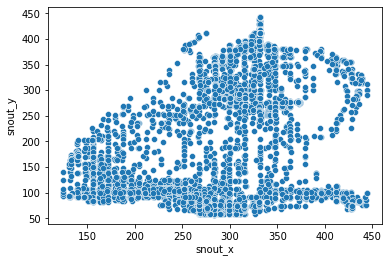

In [4]:
col = 'snout'
g = sns.scatterplot(x=data[col+'_x'], y=data[col+'_y'])

In [5]:
# flip
data[y_cols] *= -1

# remove fluctuation in reference points
def replace_w_median(df, col):
    df[col] = df[col].median()
    
for col in reference:
    replace_w_median(data, col+'_x')
    replace_w_median(data, col+'_y')
    
# make lower left corner the origin
x_adjustment = data['ll_corner_x'][0]
y_adjustment = data['ll_corner_y'][0]

for col in x_cols:
    data[col] -= x_adjustment
for col in y_cols:
    data[col] -= y_adjustment

In [6]:
# rotate axes to adjust for camera angle

adj = data['lr_corner_x'][0]
opp = - data['lr_corner_y'][0]
hyp = dist1((adj, opp))
sin = opp/hyp
cos = adj/hyp

# linear transformation in R2
for xcol, ycol in zip(x_cols, y_cols):
    X, Y = (data[xcol], data[ycol])
    data[xcol] = cos*X - sin*Y
    data[ycol] = sin*X + cos*Y
    
    
# now lr_corner will roughly sit on x-axis
# print(data['lr_corner'][0])

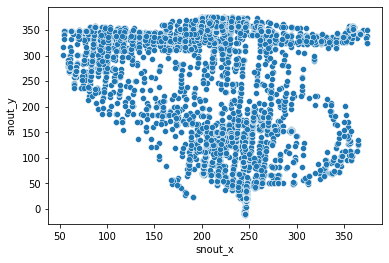

In [7]:
col = 'snout'
g = sns.scatterplot(x=data[col+'_x'], y=data[col+'_y'])

In [8]:
# drop confidence cols
data = data.drop(cfd_cols, axis=1)

In [9]:
data.to_csv('data_standarized.csv')

In [10]:
# TODO:
# - standardize the length/zoom